In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from os.path import join, exists
import matplotlib

In [37]:
def extract_layer_saturation(df, excluded = 'classifier-6', epoch=19):
    cols = list(df.columns)
    #print(cols)
    train_cols = [col for col in cols if 'train' in col and not excluded in col and not 'accuracy' in col and not 'loss' in col]
    epoch_df = df[df.index.values == epoch]
    epoch_df = epoch_df[train_cols]
    return epoch_df

In [4]:
def plot_saturation_level(df, title=''):
    cols = list(df.columns)
    #col_names = ['Layer {}'.format(i+1) for i in range(len(df.columns))]
    col_names = ['Layer {}'.format(i+1) for i in range(len(df.columns))]
    plt.figure(figsize=(7,5))
    plt.grid()
    plt.bar(list(range(len(cols))), df.values[0])
    plt.xticks(list(range(len(cols))), col_names, rotation='vertical', fontsize=16)
    plt.ylim((0,100))
    plt.yticks(fontsize=16)
    plt.xlabel('Layers', fontsize=16)
    plt.title(title, fontsize=16)
    plt.ylabel('Saturation in %', rotation='vertical', fontsize=16)
    plt.show()
    
def plot_saturation_level_ax(df, ax):
    cols = list(df.columns)
    col_names = [i+1 for i in range(len(df.columns))]
    ax.grid()
    ax.bar(list(range(len(cols))), df.values[0])
    ax.set_xticks([])
    ax.set_ylim((0,100))
    #plt.yticks(fontsize=16)
    #plt.xlabel('Layers', fontsize=16)
    #plt.title(title, fontsize=16)
    #plt.ylabel('Saturation in %', rotation='vertical', fontsize=16)_

# ADAM

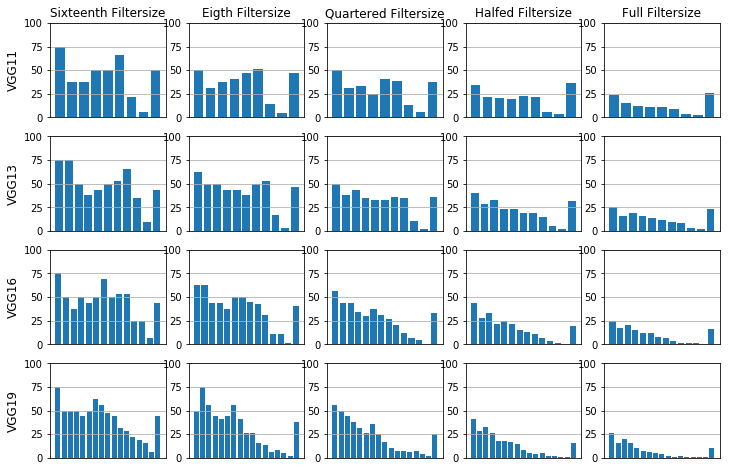

In [24]:
import matplotlib.pyplot as plt
batch_size = 8
identifieer = 'ADAM'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j])
plt.show()
#plt.savefig('collage_cifar.eps')

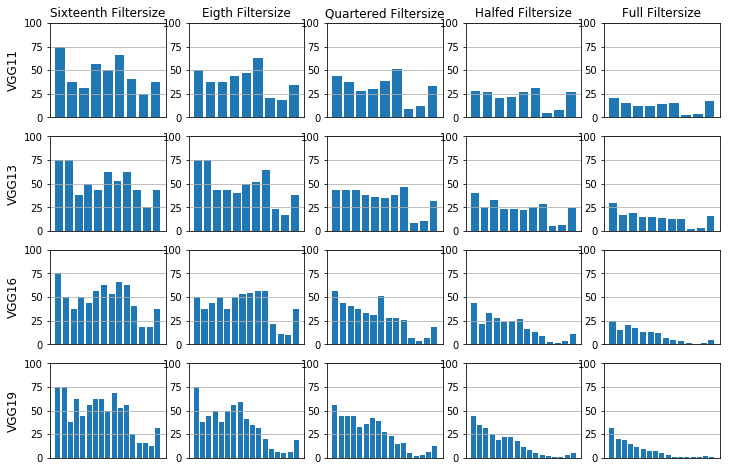

In [25]:
import matplotlib.pyplot as plt
batch_size = 32
identifieer = 'ADAM'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j])
plt.show()
#plt.savefig('collage_cifar.eps')

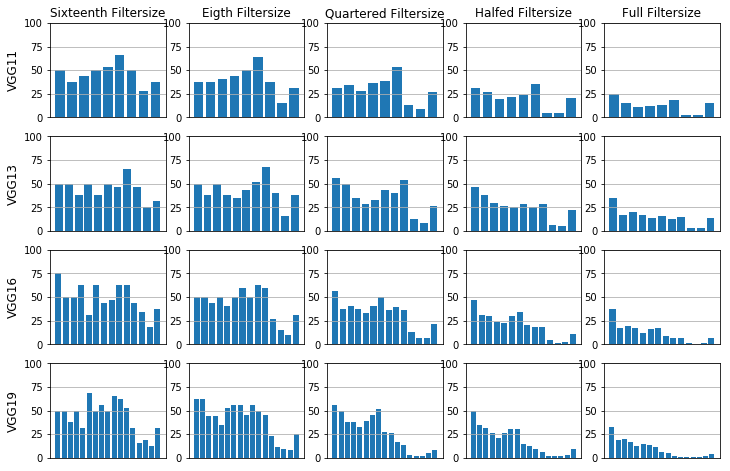

In [26]:
import matplotlib.pyplot as plt
batch_size = 128
identifieer = 'ADAM'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j])
plt.show()
#plt.savefig('collage_cifar.eps')

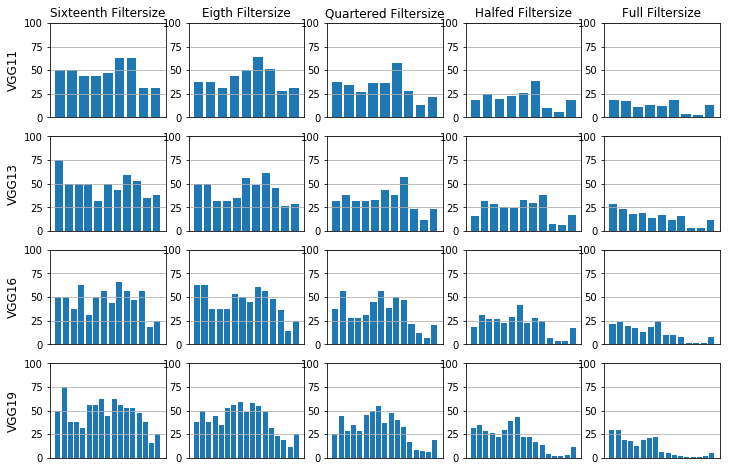

In [27]:
import matplotlib.pyplot as plt
batch_size = 512
identifieer = 'ADAM'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j])
plt.show()
#plt.savefig('collage_cifar.eps')

# RADAM

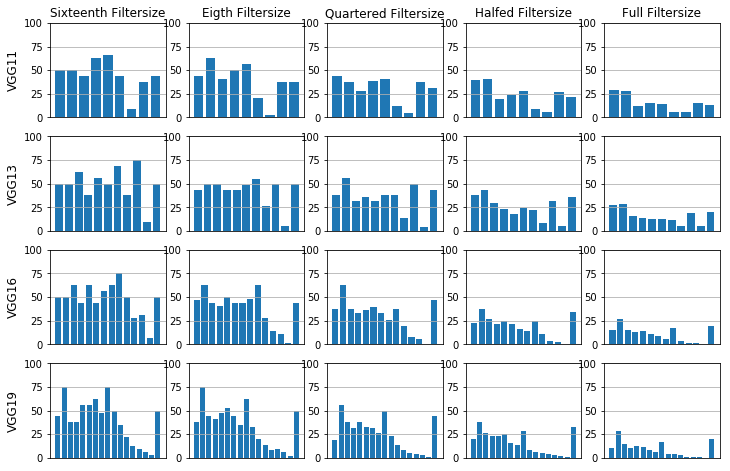

In [28]:
import matplotlib.pyplot as plt
batch_size = 8
identifieer = 'RADAM'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j])
plt.show()
#plt.savefig('collage_cifar.eps')

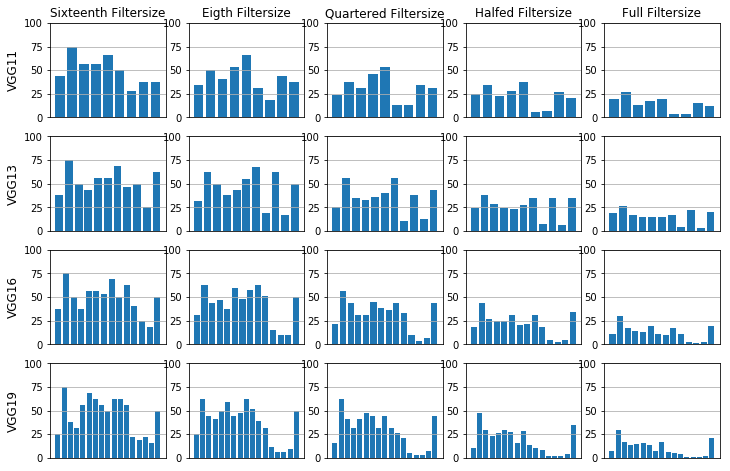

In [29]:
import matplotlib.pyplot as plt
batch_size = 32
identifieer = 'RADAM'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j])
plt.show()
#plt.savefig('collage_cifar.eps')

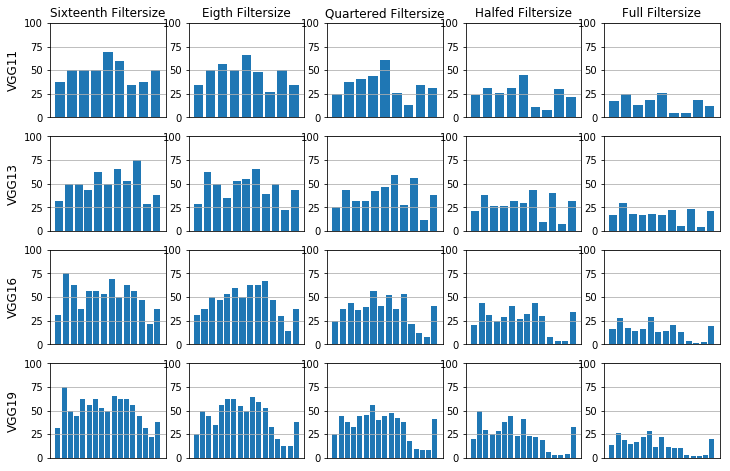

In [30]:
import matplotlib.pyplot as plt
batch_size = 128
identifieer = 'RADAM'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j])
plt.show()
#plt.savefig('collage_cifar.eps')

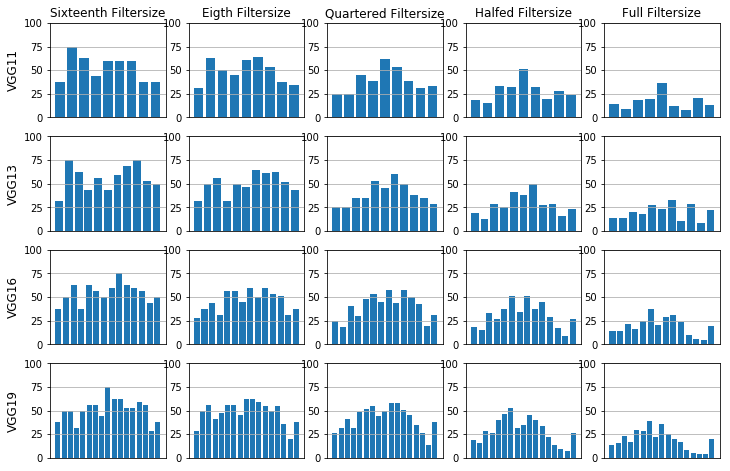

In [31]:
import matplotlib.pyplot as plt
batch_size = 512
identifieer = 'RADAM'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j])
plt.show()
#plt.savefig('collage_cifar.eps')

# Gradient Decent

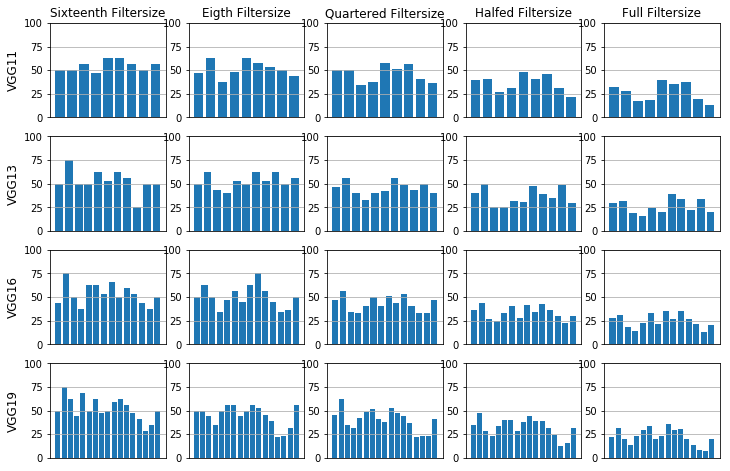

In [32]:
import matplotlib.pyplot as plt
batch_size = 8
identifieer = '0'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j])
plt.show()
#plt.savefig('collage_cifar.eps')

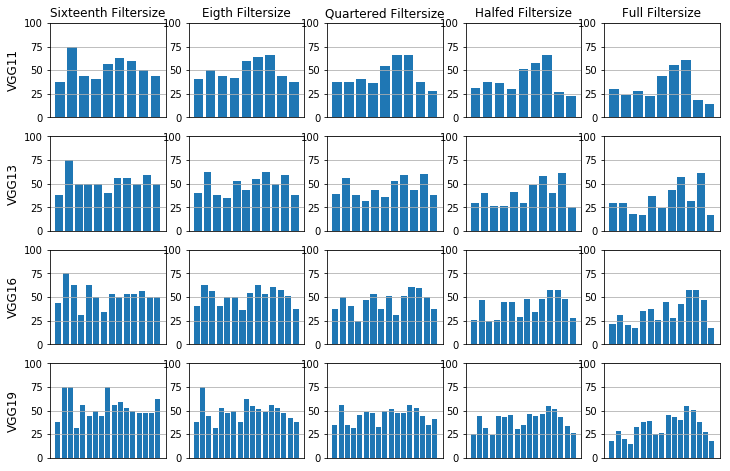

In [33]:
import matplotlib.pyplot as plt
batch_size = 32
identifieer = '0'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j])
plt.show()
#plt.savefig('collage_cifar.eps')

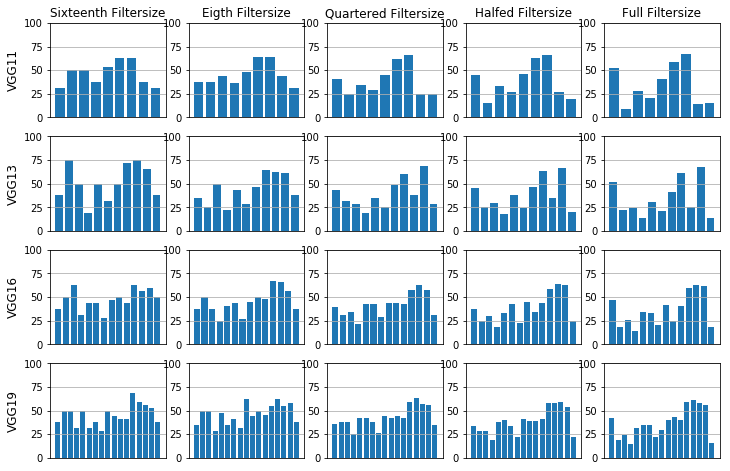

In [34]:
import matplotlib.pyplot as plt
batch_size = 128
identifieer = '0'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j])
plt.show()
#plt.savefig('collage_cifar.eps')

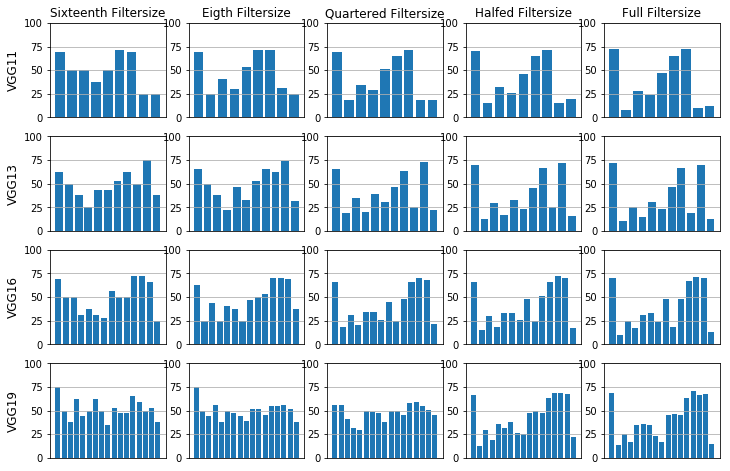

In [16]:
import matplotlib.pyplot as plt
batch_size = 512
identifieer = '0'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j])
plt.show()
#plt.savefig('collage_cifar.eps')

# Decaying Learning Rate

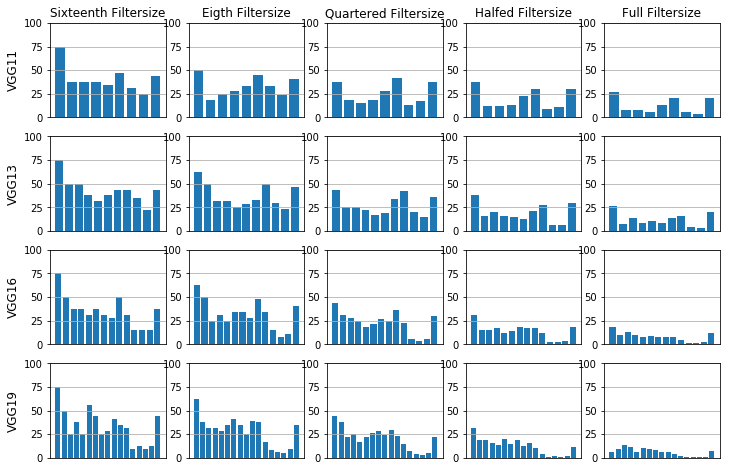

In [17]:
import matplotlib.pyplot as plt
batch_size = 8
identifieer = 'LRS'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j])
plt.show()
#plt.savefig('collage_cifar.eps')

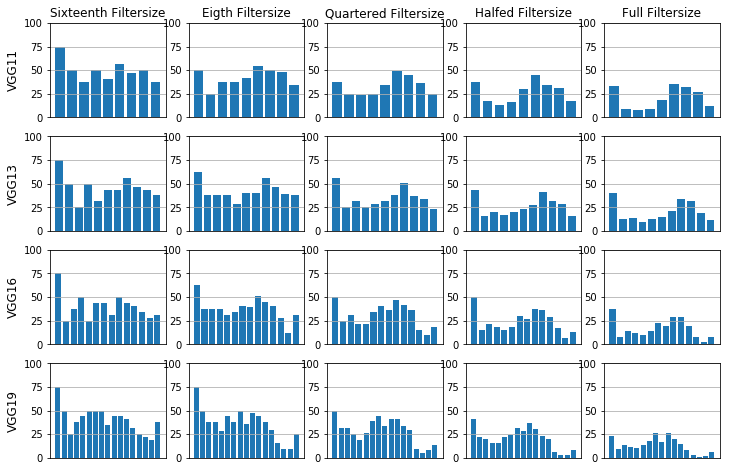

In [18]:
import matplotlib.pyplot as plt
batch_size = 32
identifieer = 'LRS'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j])
plt.show()
#plt.savefig('collage_cifar.eps')

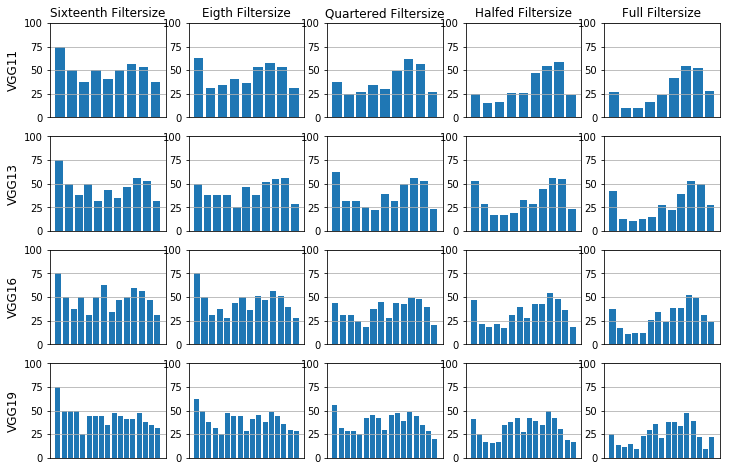

In [19]:
import matplotlib.pyplot as plt
batch_size = 128
identifieer = 'LRS'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j])
plt.show()
#plt.savefig('collage_cifar.eps')

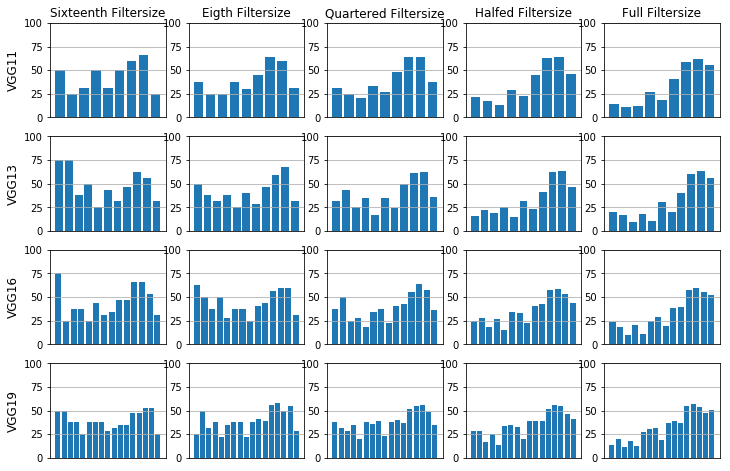

In [39]:
import matplotlib.pyplot as plt
batch_size = 512
identifieer = 'LRS'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
        #print(filename)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j])
plt.show()
#plt.savefig('collage_cifar.eps')

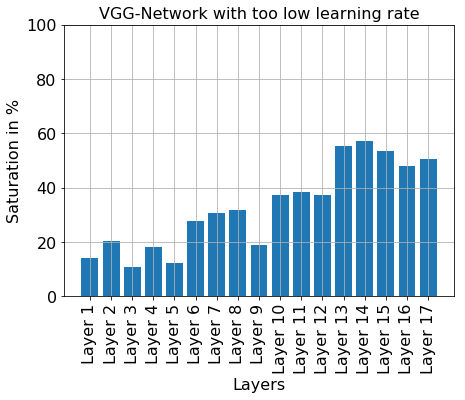

In [41]:
filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifieer))
df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
plot_saturation_level(df, 'VGG-Network with too low learning rate')

In [22]:
df.head()

,train-saturation_features-0,train-saturation_features-3,train-saturation_features-7,train-saturation_features-10,train-saturation_features-14,train-saturation_features-17,train-saturation_features-20,train-saturation_features-23,train-saturation_features-27,train-saturation_features-30,train-saturation_features-33,train-saturation_features-36,train-saturation_features-40,train-saturation_features-43,train-saturation_features-46,train-saturation_features-49,train-saturation_classifier-2
19,14.06,20.31,10.94,17.97,12.11,27.73,30.47,31.64,18.75,37.11,38.48,37.11,55.27,57.23,53.52,47.85,50.39
